In [1]:
from IPython.display import Image

# 1 CNN

## 1.1 이미지 영상인식의 혁명과도 같은 CNN

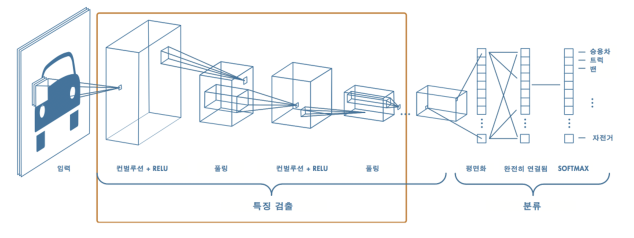

In [2]:
Image("cnn1.png")

## 1.2 Convolutional Filtrer

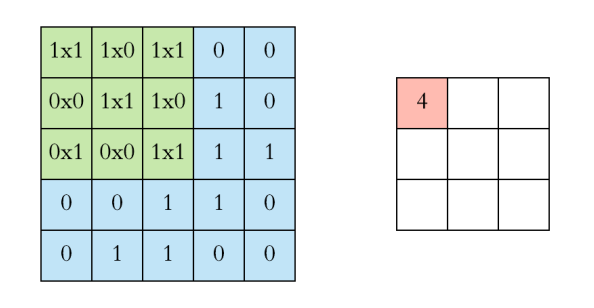

In [3]:
Image("cnn2.png")

- 물론 학습을 통해 필터까지 구할 수 있다.

## 1.3 Convolutional 필터의 결과 (예시)

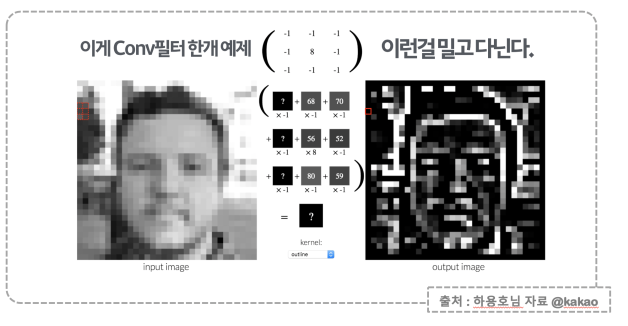

In [4]:
Image("cnn3.png")

## 1.4 Conv 필터의 의미

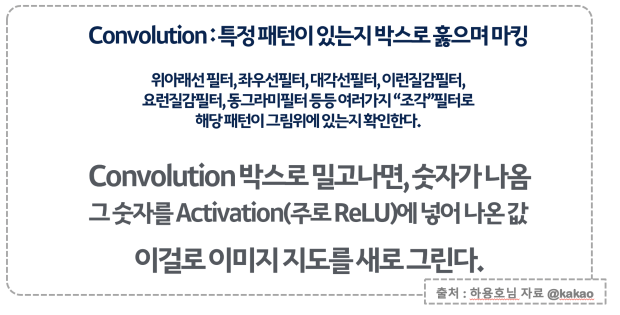

In [5]:
Image("cnn5.png")

## 1.5 그럼 풀링은 뭐지?

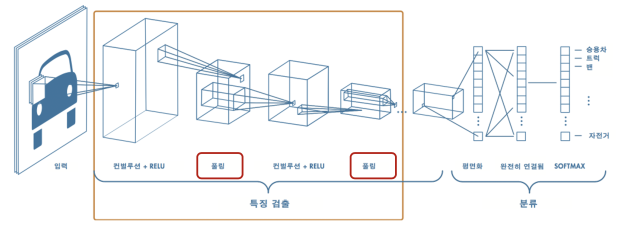

In [6]:
Image("cnn6.png")

## 1.6 이런 그림은 뭘까?

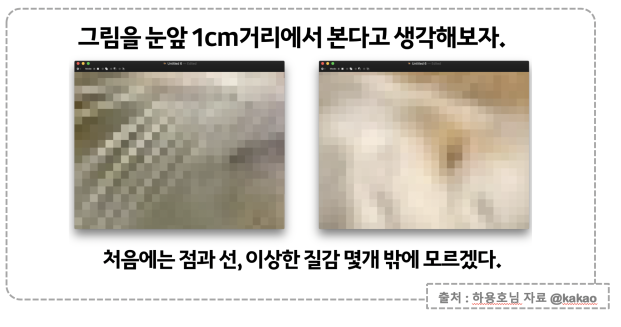

In [7]:
Image("cnn4.png")

## 1.7 거리를 두면

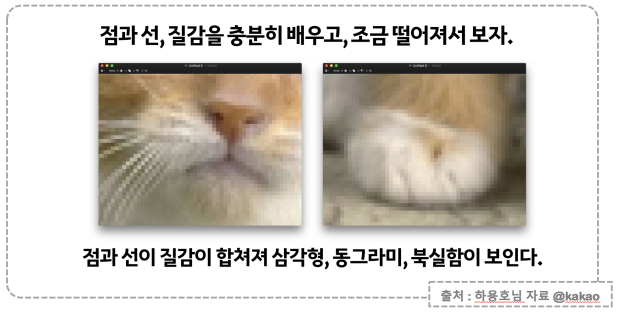

In [10]:
Image("cnn18.png")

## 1.8 좀 더 멀리

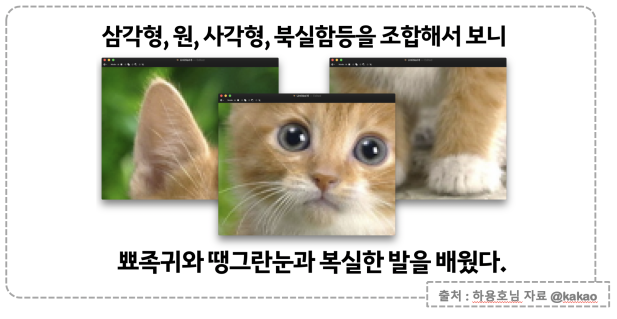

In [8]:
Image("cnn7.png")

## 1.9 누구 아이디언지 참 설명 잘했다

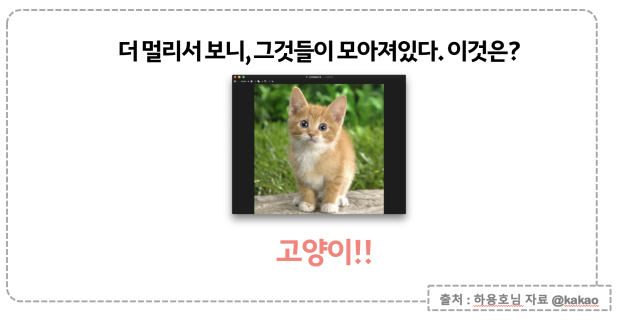

In [9]:
Image("cnn8.png")

## 1.10 풀링의 의미

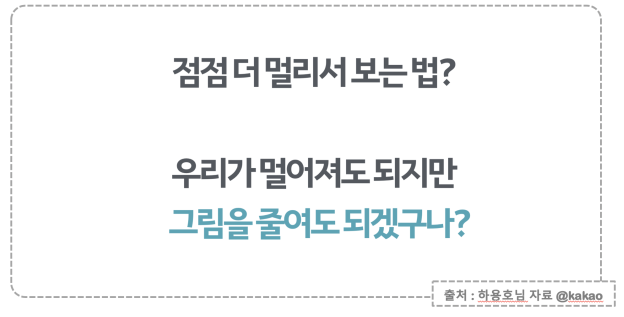

In [11]:
Image("cnn9.png")

## 1.11 MaxPooling

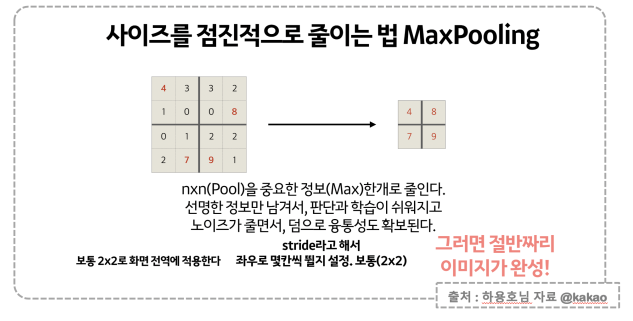

In [12]:
Image("cnn10.png")

## 1.12 MaxPooling

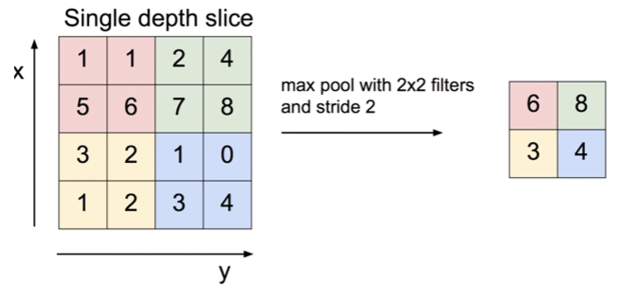

In [13]:
Image("cnn11.png")

## 1.13 Conv Layer의 의미

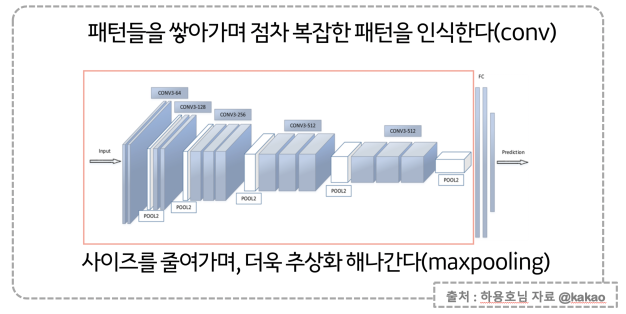

In [14]:
Image("cnn12.png")

## 1.14 결론

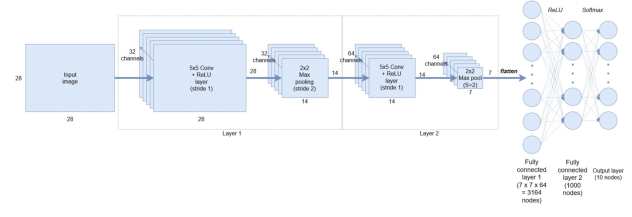

In [15]:
Image("cnn13.png")

## 1.15 모델과 코드

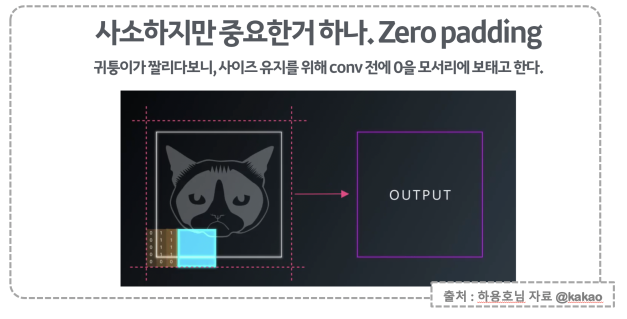

In [16]:
Image("cnn14.png")

## 1.16 Zero padding

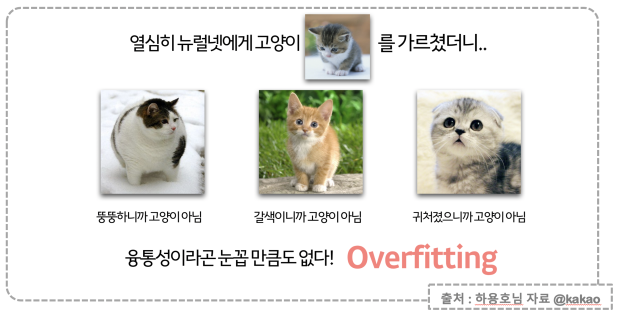

In [17]:
Image("cnn15.png")

## 1.17 잠깐 dropout은 뭐지

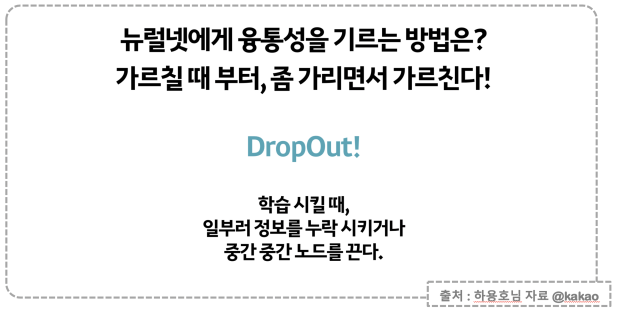

In [18]:
Image("cnn16.png")

## 1.18 Dropout

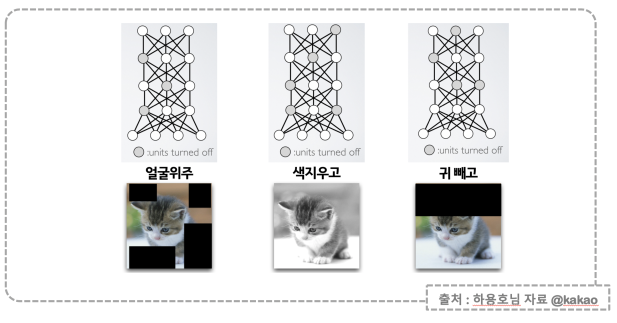

In [19]:
Image("cnn17.png")

## 1.19 Dropout은 응용력을 주는 것

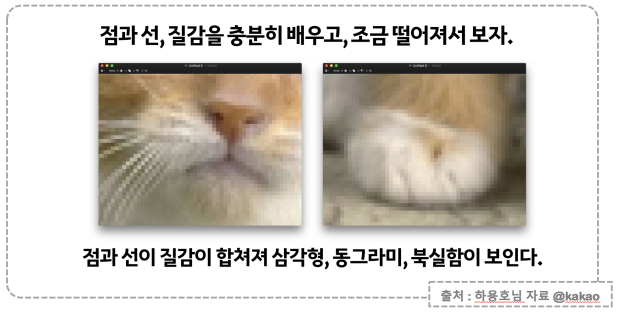

In [20]:
Image("cnn18.png")

# 2 이제 코드

## 2.1 데이터 받고 정리

In [21]:
from tensorflow.keras import datasets

mnist = datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

2022-11-24 19:24:59.501330: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-24 19:24:59.649525: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-24 19:25:00.138026: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda-11.3/lib64
2022-11-24 19:25:00.138105: W tensorflow/compiler/xla/strea

## 2.2 모델 구성

## 2.3 찾아야할 변수

In [22]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                  padding='same', activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    layers.Conv2D(64, (2, 2), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0

2022-11-24 19:25:01.326253: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-24 19:25:01.331034: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-24 19:25:01.331409: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-24 19:25:01.332062: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operati

## 2.4 훈련 시작~

## 2.5 오래걸린다.

In [23]:
import time

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test),
                 epochs=5, verbose=1)

print('Fit time :', time.time() - start_time)

Epoch 1/5


2022-11-24 19:25:02.785341: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2022-11-24 19:25:03.474427: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8201
2022-11-24 19:25:05.196849: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2022-11-24 19:25:05.198222: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7fc41c795880 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2022-11-24 19:25:05.198239: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2022-11-24 19:25:05.202374: I tensorflow/compiler/mlir/tensorflow/utils/du

1875/1875 [==============================] - 10s 3ms/step - loss: 0.1148 - accuracy: 0.9644 - val_loss: 0.0374 - val_accuracy: 0.9875
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0452 - accuracy: 0.9856 - val_loss: 0.0311 - val_accuracy: 0.9892
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0320 - accuracy: 0.9898 - val_loss: 0.0430 - val_accuracy: 0.9864
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0244 - accuracy: 0.9922 - val_loss: 0.0334 - val_accuracy: 0.9899
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0213 - accuracy: 0.9931 - val_loss: 0.0384 - val_accuracy: 0.9887
Fit time : 35.208215951919556


## 2.6 훈련 상황은?

## 2.7 학습은 너무 잘 된다

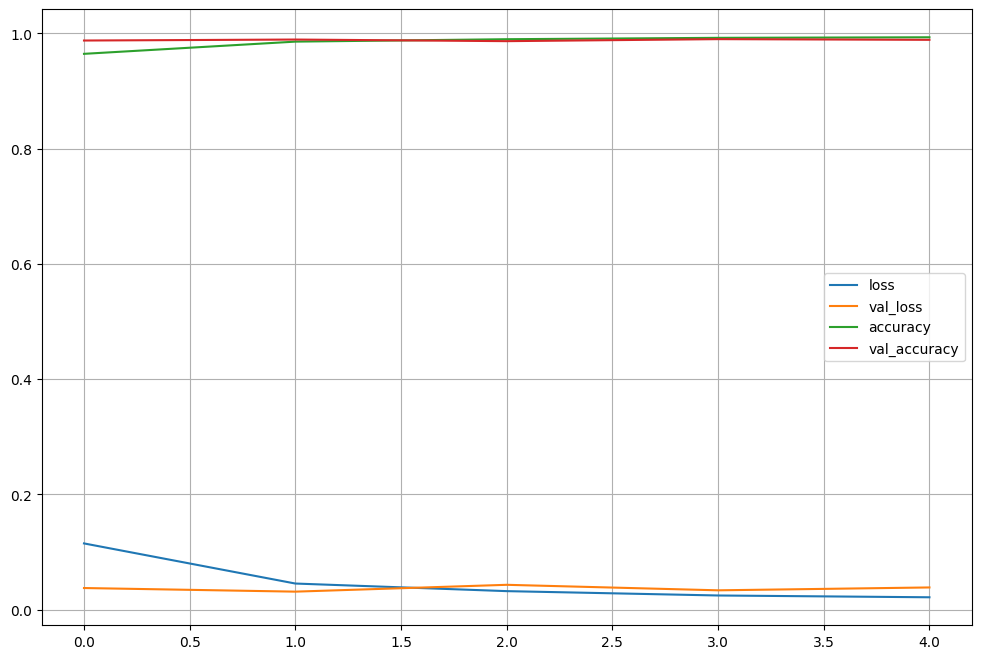

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)
    
plt.legend()
plt.grid()
plt.show()

## 2.8 Test Accuracy 99%

In [25]:
score = model.evaluate(x_test, y_test)
print('Test loss :', score[0])
print('Test acccuracy :', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0384 - accuracy: 0.9887
Test loss : 0.03839196637272835
Test acccuracy : 0.9886999726295471


## 2.9 다시 틀린 데이터 찾으러 가자

In [26]:
import numpy as np

predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

313/313 [==============================] - 0s 1ms/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

## 2.10 틀린 데이터를 모으고

In [27]:
wrong_result = []

for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)
        
len(wrong_result)

113

## 2.11 틀린 것 중에 16개만

In [28]:
import random

samples = random.choices(population=wrong_result, k=16)
samples

[4507,
 4860,
 2293,
 5887,
 2454,
 4536,
 3073,
 1014,
 4547,
 4814,
 9698,
 9642,
 1393,
 4176,
 4814,
 4176]

## 2.12 직접 보기

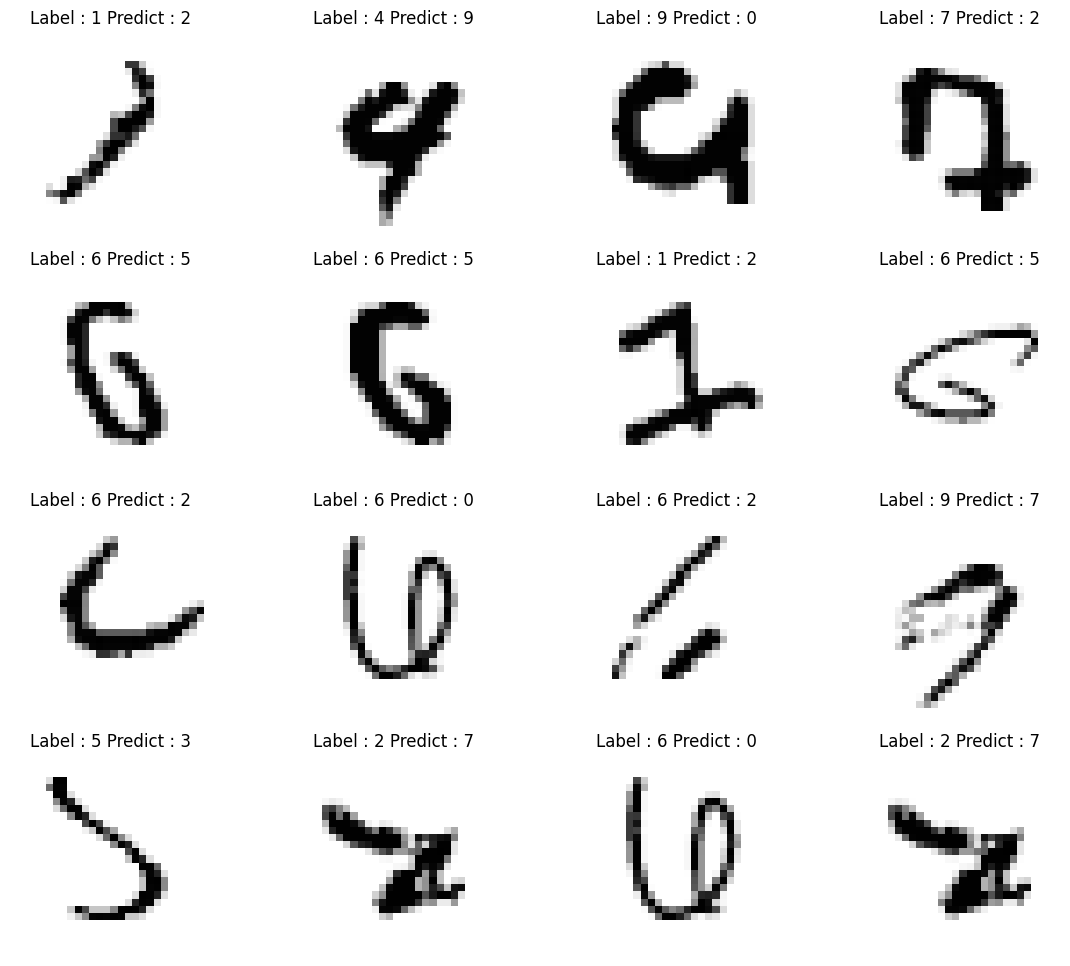

In [29]:
plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(x_test[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.title('Label : ' + str(y_test[n]) + ' Predict : ' + str(predicted_labels[n]))
    plt.axis('off')

plt.show()

## 2.13 틀리기 쉬운 1%들

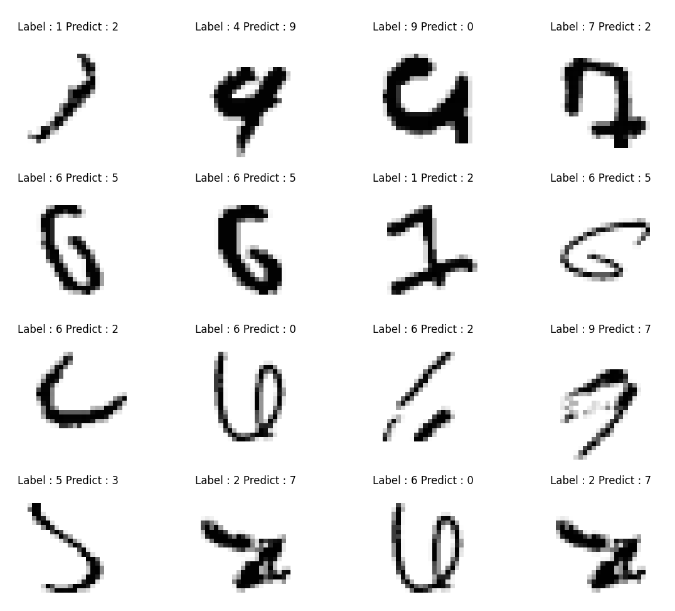

In [31]:
Image("cnn19.png")

## 2.14 모델 저장

In [10]:
model.save('MNIST_CNN_model.h5')

# 3 Fashion MNIST에도 적용해보자

## 3.1 MNIST와 동일한 코드에서

In [19]:
from tensorflow.keras import datasets

mnist = datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

-  위에 표시된 부분만 변경하면 된다

In [20]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                  padding='same', activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    layers.Conv2D(64, (2, 2), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0         
                                                                 
 flatten_1 (Flatten)         (None, 3136)             

In [21]:
import time

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test),
                 epochs=5, verbose=1)

print('Fit time :', time.time() - start_time)

Epoch 1/5


2022-11-24 16:18:50.585850: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_1/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1875/1875 [==============================] - 9s 4ms/step - loss: 0.3870 - accuracy: 0.8572 - val_loss: 0.2924 - val_accuracy: 0.8921
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2646 - accuracy: 0.9015 - val_loss: 0.2574 - val_accuracy: 0.9050
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2250 - accuracy: 0.9163 - val_loss: 0.2589 - val_accuracy: 0.9047
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1934 - accuracy: 0.9266 - val_loss: 0.2332 - val_accuracy: 0.9168
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1673 - accuracy: 0.9368 - val_loss: 0.2341 - val_accuracy: 0.9138
Fit time : 37.4890923500061


## 3.2 약간의 과적합이 관찰되기도 하지만

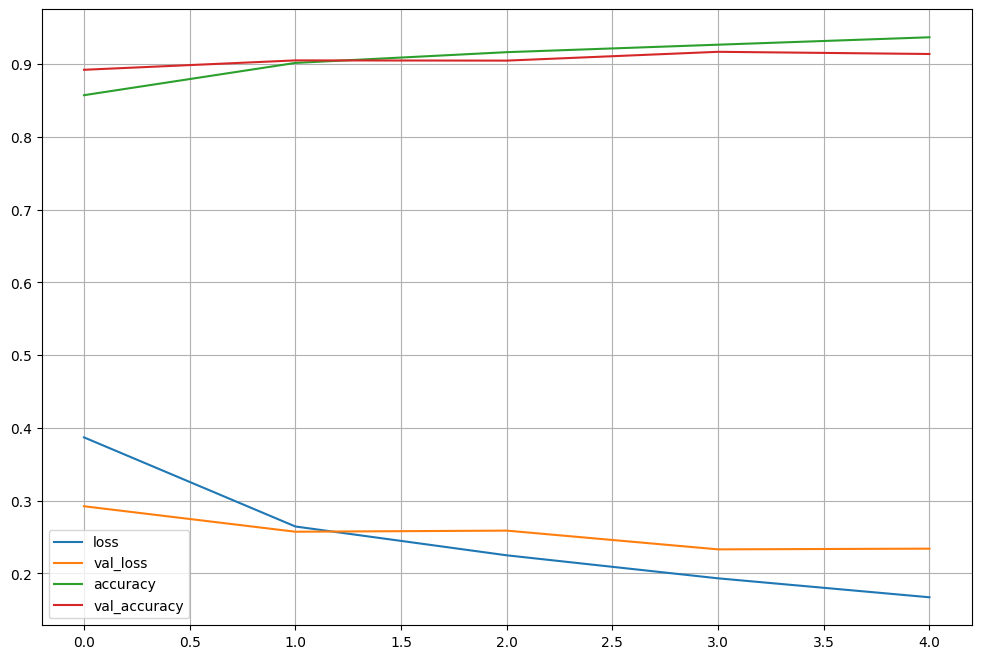

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)
    
plt.legend()
plt.grid()
plt.show()

## 3.3 test accuracy가 91.9%

In [23]:
score = model.evaluate(x_test, y_test)
print('Test loss :', score[0])
print('Test acccuracy :', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.2341 - accuracy: 0.9138
Test loss : 0.23413805663585663
Test acccuracy : 0.9138000011444092


## 3.4 조심!
- 이 모델을 저장하면 이후 과정을 진행하기 어렵다